# CS224n: NLP with Deep Learning

# Lecture 6: Language Models and Recurrent Neural Networks

---

## Language Modelling

### Definition

* Language Modelling = Predict what word comes next

Given a sequence of words $x^{(1)}, x^{(2)}, ..., x^{(t)} $  
compute probability distribution of $x^{(t+1)}$:

$$ P(x^{(t+1)} | x^{(t)}, ..., x^{(1)}) $$ 

* $x^{(t+1)}$ can be any word in a predefined vocabulary of words

### n_gram Language Model

* Collect statistics of how often different n-gams occur:  
We just count them in a large corpus of text

$ P(w|students\,opened\,their) = \frac{ count(students\,opened\,their\,w)}{count(students\,opened\,their)} $

#### Problems

##### Sparsity problem 1

* "students opened their $w$" has never occured before  
If a specific n-gram equals 0, it will never be predicted  

Solution  
→ add a small smoothing term $\delta$ to the count of every word, so that they all at least have a small probability

##### Sparsity problem 2

* "students opened their" has never occured before  

Solution: backoff!   

→ Go back to "opened their" to predict the next word

* These sparsity problems get worse and worse with *n* increasing:  
thus, we have to keep $n < 5$

##### Storage problems

* We have to store counts for a lot of different n-grams

### A Neural Language Model

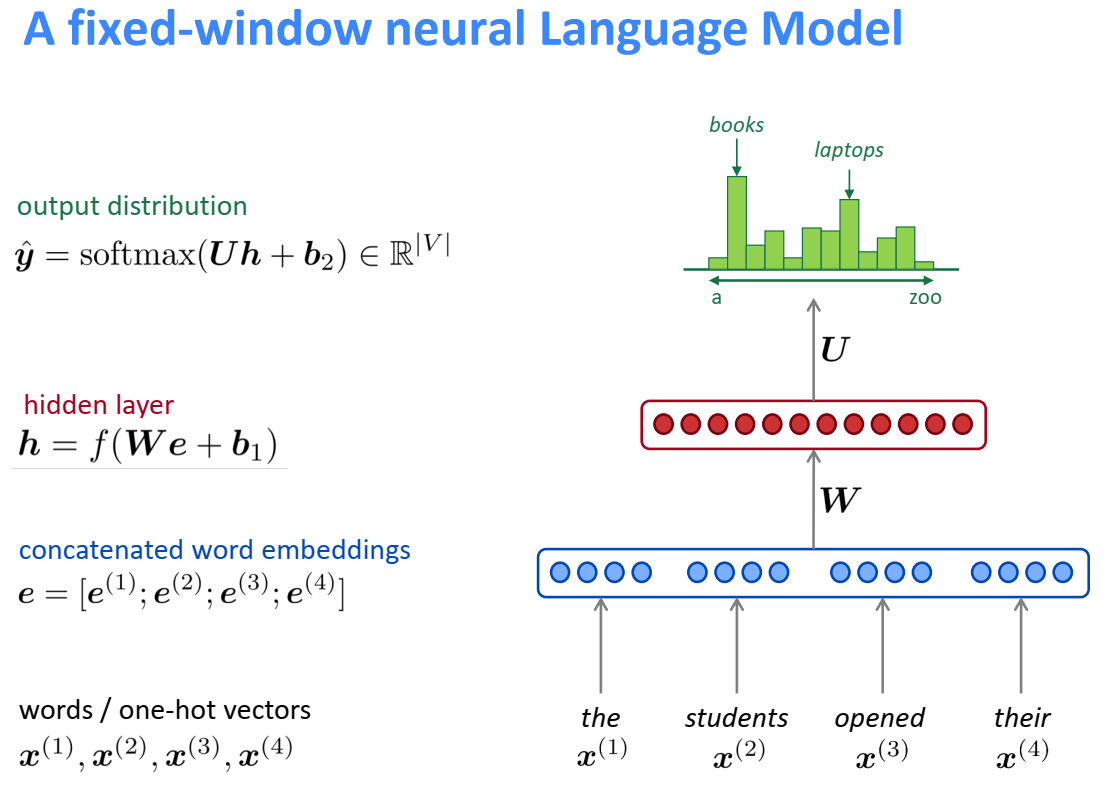

Problem:

* The weights of all the input words are all completely separated from each other:  
we learn the same things 4 times, instead of having each word reinforcing our learning

* There should be a lot of commonality in how we treat our way embeddings:   processing 1st position shouldn't be too different from 3rd position

→ We NEED an architecture that can process **any length input**

## Recurrent Neural Networks (RNN)

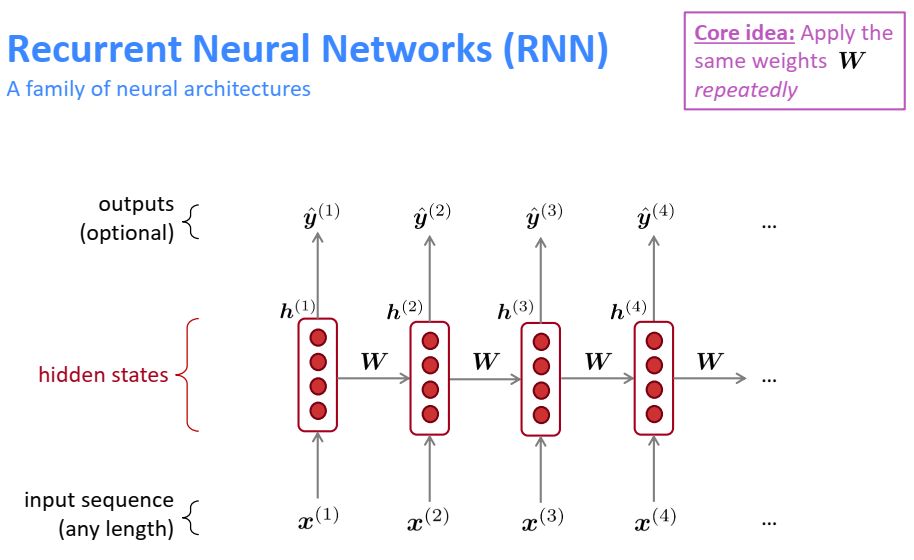

* Each hidden state is computed using both:
    * the previous hidden state
    * the input at that step

* Timestamp = hidden state (synonym)

**Core idea**

* We apply the **same** weights matrix $W$ at every step

* Our outputs $ \hat{y} $ can be optionnally computed, for each step, or for a few steps only (depending on our goal)

* The embeddings could be dowloaded, and then fixed, or also fine-tuned, or also learned from scratch

* We learn both $ W_{e} $ and $ W_{h} $

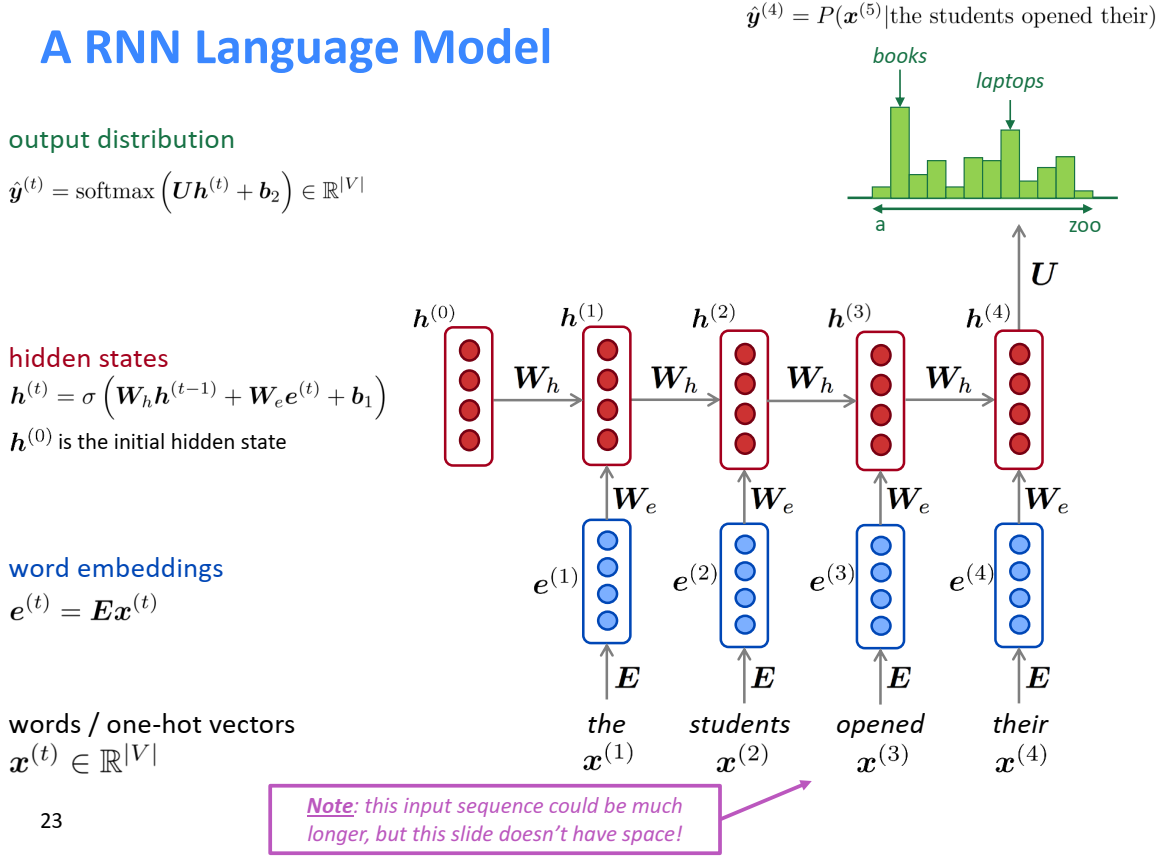

### Advantages

* RNN can process any length of inputs
* When computing step $t$, we are using information from many steps ago
* Model size is fixed (doesn't depend on the size of input)
* The inputs are processed symmetrically, as the same weights are applied at each step

### Disadvantages

* Computation is **slow**, as it is sequential
* In practice, information from many steps back is hard to access

### Training a RNN Language Model

* For every step, compute the output distribution
* Compute the loss function on step $t$:  
Cross-entropy loss between this predicted probability distribution, and the true next word
* Compute the **overall loss** by averaging all these losses, on every word of the training set

**Problem**

Computing loss and gradients on whole corpus is too expensive !

**Solution**

→ Use a shorter sequence: a sentence, or a document for example

* Use **Stochastic Gradient Descent**:  

only compute loss for a few sentences, and then update

## RNNs

## Big section Title

### Sub-section Title

* King - Man ~= Idea of Kingship without the Man Part
* +Woman = add Woman Idea to it
* => Get Queen

Plot words on a scatter plot:

### Word2vec : Vectorization

We have 2 big matrices:
* 1 that represents every outside word's vector $U$
* 1 which represents every center word's vector $V$

$$U = \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}$$

$$V = \begin{bmatrix}[center\,word\,vector\,1]
\\ \vdots
\\ [center\,word\,vector\,n] \end{bmatrix}$$

* We multiply $U$ by a center word $v_{4}$

$$\begin{align*}
U \cdot v_{4} &= \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}
\cdot v_{4}
\\ &=\begin{bmatrix}[similarity\,(u_{1}, v_{4})]
\\ \vdots
\\ [similarity\,(u_{n}, v_{4})] \end{bmatrix}
\end{align*}$$

* We apply softmax to get a vector of probabilities

$$softmax(U\cdot u_{4})$$

#### Remark 1
**The outside words that are predicted will always be the same !!**

This means that our model will give a reasonably high probability estimate to all words that occur in the context

#### Remark 2
The words 'and', 'the', 'of', ... will have very high frequency with all the other words

#### Remark 3
The 2D-projections of the word clouds are very misleading  
In very high dimensional space, a word can be close to lots of other words

---

## Optimization: Gradient Descent

**Objective:**
* Minimise cost function $J(\theta)$

**Idea:** 
* For current value of $\theta$, calculate the gradient of $J(\theta)$
* Take a small step in the direction of negative gradient

$$ \theta^{new} = \theta^{old} - \alpha \nabla_{\theta}J(\theta) $$ where $\alpha$ is the learning rate

### Stochastic Gradient Decsent

**Problem:**

* $J(\theta)$ is a function of all windows in the corpus!!

**Solution:**

Stochastic Gradient Descent !

* Repeatedly sample windows
* Update our parameters after going through each window
* The parameters are updated with amazingly noisy gradient, but it doesn't matter too much 
* It allows us to go much quicker

#### Remark 1

Choose mini-batch size of 32, 64, or other powers of 2, as they allow to make the most out of parallelization

#### Remark 2

* In each window, we have a certain number of words $2m+1$
* Our parameter vector $\theta$ is in $\mathbb{R}^{2dV}$, which is much bigger
* Hence, $\nabla_{\theta} J(\theta)$ is a very sparce matrix

=> **Idea:**

Only update the word vectors that appear in our window!

### Why 2 vectors for each word?

* It is easy to optimize
* We just average them to get a unique word vector in the end

#### 2 Model variants

1. Skip-gram: Predict outside words (position independent) given center word
2. Continuous Bag of Words: predict center word from a Bag of context words

The results we get via these 2 methods are quite similar, as the dot product is symmetric

### Negative Sampling

**Idea:**

Train binary logistic regression for a true pair (center word & word in its context window)  
VS  
Several noise pairs (center word & a random word) = Negative samples

* Maximize probability that real outside word appears
* Minimize probability that random words appear around center word

We sample these words using the Unigram distribution to determine their probability of being sampled

$$P(w) = U(w)^{3/4} / Z$$

* The 3/4 power helps to make the most frequent words appear more often, and the less frequent words appear more
* $Z$ is a normalization factor

**Remark:**

The sigmoid function is like a binary case for the softmax function: maps our values to a probability distribution in [0,1]

-----------------

## Count-based methods

We could also count co-occurences of words within a certain window...  
Why don't we just do that?

We could create a matrix of co-occurrences  


![Co-Occurences matrix](images\Lecture02_cooccurences_matrix_boxes.png)

2 words would be 'similar' if their co-occurence vectors are similar

### Reduced SVD

Singular Value Decomposition

$$ X = U * \Sigma * V^{T} $$

* $\Sigma$ is a diagonal matrix (can be rectangular if X not square)  
Its diagonal values are in decreasing order
* $U$, $V$ are square matrices

**Reduced version:**  
We remove the dimensions with the lowest diagonal values for $\Sigma$  
The corresponding column of $U$, and line of $V^{T}$ are removed as well  
We then have $k$ dimensions left

We the get the best rank $k$ approximation to X, in terms of least squares

### Improvement ideas (*Rohde, 2005*)

* Windows that give more importance to closer words:  
Same as in word2vec, we sample closer words more often

### Comparison of the 2 methods

![](images\Lecture02_CountBased-VS-DirectPred.png)

---

## GloVe

### General Idea

**You want to have components of meaning to be linear operations in a vector space !**  
In particular, ratios of co-occurrence probabilities

We want to have dot-product to be equal to log(Probability)

$$ w_{i} \cdot w_{j} = log P(i|j) $$

so that:

$$ w_{x} \cdot (w_{a} - w_{b}) = log \frac {P(x|a)} {P(x|b)} $$

Thus, 
* The objetive function is the squared difference between the dot-product and the log of the co-occurence probabilities  
* It is complexified a bit by adding bias terms for both words
* The $f$ function is used to limit the influence of very common words pairs

$$ J = \sum_{i, j=1}^V f(X_{ij}) \, (w_{i}^{T} \tilde{w_{j}} + b_{i} + \tilde{b_{j}} - log X_{ij})^2 $$

---

## Evaluating word vectors

Intrinsic VS Extrinsic evaluation

### Intrinsic

* Evaluation on a specific / intermediate task
* Fast to compute

### Extrinsic

* Evaluation on a real task that humans like to use  
(web search, question answering, phone dialogue system...)
* Can take a long time to compute accuracy
* Unclear where the problem is:
    * The subsystem?
    * Its interaction with other subsystems?

---

### On the Dimensionality of Word Embeddings

There seems to be a blip at 200-300, for the dimension of the embeddings, that seems to optimize performance

The performance stays flat, even when we continue to increase dimensionality up to infinity

Using Wikipedia data seems to work better than a news corpus

---

## Word Senses

Words can have lots of meanings!  
(especially common words, and words that have existed for a long time)

### First simple idea

* Cluster word windows around words: 1 word vector for each sense

### Different senses using linear superposition

Different senses of a word reside in a weighted sum of the vectors of each sense

$$ v_{pike} = \alpha_{1} v_{pike_{1}} + \alpha_{2} v_{pike_{2}} + \alpha_{3} v_{pike_{3}} $$

where:
$$ \begin{align*}
 \alpha_{1} &= \frac{f_{1}}{f_{1}+f_{2}+f_{3}}
\\ f_{i} &= frequency\,(word\,i)
\end{align*} $$

Because we have so many dimensions, and as the words vectors for each sense are sparse, the results we get are quite good !!

Thus, we can get back the vectors of the senses using the weighted summed vector !!

---

## LaTeX templates

$$U = \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}$$

$$V = \begin{bmatrix}[center\,word\,vector\,1]
\\ \vdots
\\ [center\,word\,vector\,n] \end{bmatrix}$$

* We multiply $U$ by a center word $v_{4}$

$$\begin{align*}
U \cdot v_{4} &= \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}
\cdot v_{4}
\\ &=\begin{bmatrix}[similarity\,(u_{1}, v_{4})]
\\ \vdots
\\ [similarity\,(u_{n}, v_{4})] \end{bmatrix}
\end{align*}$$

* We apply softmax to get a vector of probabilities

$$ \theta^{new} = \theta^{old} - \alpha \nabla_{\theta}J(\theta) $$ where $\alpha$ is the learning rate

$$ X = U * \Sigma * V^{T} $$

$$P(w) = U(w)^{3/4} / Z$$

$$ w_{i} \cdot w_{j} = log P(i|j) $$

so that:

$$ w_{x} \cdot (w_{a} - w_{b}) = log \frac {P(x|a)} {P(x|b)} $$

$$softmax(U\cdot u_{4})$$

$$ J = \sum_{i, j=1}^V f(X_{ij}) \, (w_{i}^{T} \tilde{w_{j}} + b_{i} + \tilde{b_{j}} - log X_{ij})^2 $$

$$ v_{pike} = \alpha_{1} v_{pike_{1}} + \alpha_{2} v_{pike_{2}} + \alpha_{3} v_{pike_{3}} $$

where:
$$ \begin{align*}
 \alpha_{1} &= \frac{f_{1}}{f_{1}+f_{2}+f_{3}}
\\ f_{i} &= frequency\,(word\,i)
\end{align*} $$